In [11]:
import numpy as np 
from math import pi 
import matplotlib.pyplot as plt 
from scipy import special

In [12]:
def f(x):
        a = 1 / 100
        si, ci = special.sici(x / a)
        return si * np.exp(-x ** 2 / 2)

In [13]:
# random sample from U(-pi,pi)
N = 512
# N = 10**4
x = np.random.uniform(-pi,pi,N)
x.sort()
b1,b2,b3 = np.random.uniform(0,2*pi,3)
# y = np.sin(x) + np.sin(10*x+b1) + np.sin(20*x+b2) + np.sin(30*x+b3)
y = f(x)

# reshaping 
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [14]:
import tensorflow as tf 
from tensorflow import keras 

In [15]:
# define the keras model 
K = 64
input_layer = keras.Input(shape = (1, ))
hidden_layer_1 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_2 = keras.layers.Dense(units = K, activation = 'sigmoid')
hidden_layer_3 = keras.layers.Dense(units = K, activation = 'sigmoid')
hidden_layer_4 = keras.layers.Dense(units = K, activation = 'sigmoid')
hidden_layer_5 = keras.layers.Dense(units = K, activation = 'sigmoid')
output_layer = keras.layers.Dense(units = 1, 
                                    use_bias = False)
model = keras.Sequential([input_layer, 
                          hidden_layer_1,
                          hidden_layer_2, 
                          hidden_layer_3, 
                          hidden_layer_4, 
                          hidden_layer_5, 
                          output_layer])

# compling the model 
adam = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer = 'adam', loss = 'mse')

In [16]:
def NN_epoch(n_epoch):
    # fitting the data 
    history = model.fit(x, y, epochs=n_epoch, batch_size=512,validation_split=0.2)

    # predicting the data
    predict_1 = model.predict(x)

    # plot the graph
    plt.figure('20 Epochs', figsize = (10,7))
    plt.plot(x, y)
    plt.plot(x, predict_1, 'r*')
    plt.ylabel('y', fontsize=15)
    plt.xlabel('x', fontsize=15)
    plt.legend(['f(x)', 'beta(x)'], loc='upper left', fontsize=12)
    plt.show()

    # plot the loss
    plt.figure('20 Epochs 1', figsize = (10,7))
    my_loss = history.history['loss']
    my_vali_loss = history.history['val_loss']
    mvs = np.arange(0,np.size(my_loss),dtype='float32')
    plt.semilogy(mvs,my_loss)
    plt.semilogy(mvs,my_vali_loss)
    plt.legend(['loss', 'val_loss'],  loc='upper left', fontsize=12)
    plt.show()

Epoch 1/20
1/1 [==============================] - 0s 377ms/step - loss: 0.9679 - val_loss: 0.0129
Epoch 2/20
1/1 [==============================] - 0s 20ms/step - loss: 0.9014 - val_loss: 0.0173
Epoch 3/20
1/1 [==============================] - 0s 19ms/step - loss: 0.8654 - val_loss: 0.0452
Epoch 4/20
1/1 [==============================] - 0s 21ms/step - loss: 0.8568 - val_loss: 0.0837
Epoch 5/20
1/1 [==============================] - 0s 19ms/step - loss: 0.8662 - val_loss: 0.1154
Epoch 6/20
1/1 [==============================] - 0s 21ms/step - loss: 0.8796 - val_loss: 0.1295
Epoch 7/20
1/1 [==============================] - 0s 21ms/step - loss: 0.8864 - val_loss: 0.1259
Epoch 8/20
1/1 [==============================] - 0s 19ms/step - loss: 0.8846 - val_loss: 0.1101
Epoch 9/20
1/1 [==============================] - 0s 21ms/step - loss: 0.8771 - val_loss: 0.0883
Epoch 10/20
1/1 [==============================] - 0s 20ms/step - loss: 0.8679 - val_loss: 0.0661
Epoch 11/20
1/1 [===========

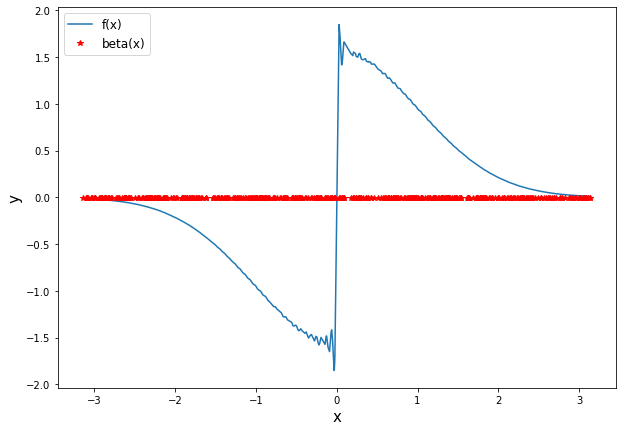

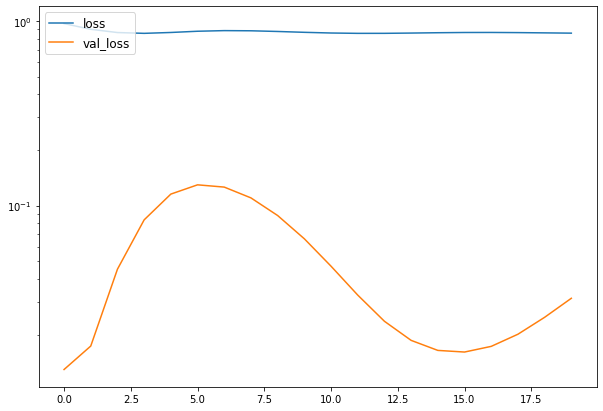

In [17]:
NN_epoch(20)

Epoch 1/100
1/1 [==============================] - 0s 42ms/step - loss: 0.8568 - val_loss: 0.0396
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.8560 - val_loss: 0.0482
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.8565 - val_loss: 0.0560
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.8577 - val_loss: 0.0618
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.8589 - val_loss: 0.0646
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.8596 - val_loss: 0.0641
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.8595 - val_loss: 0.0607
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 0.8586 - val_loss: 0.0553
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 0.8574 - val_loss: 0.0490
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 0.8563 - val_loss: 0.0426
Epoch 11/100
1/1 [=

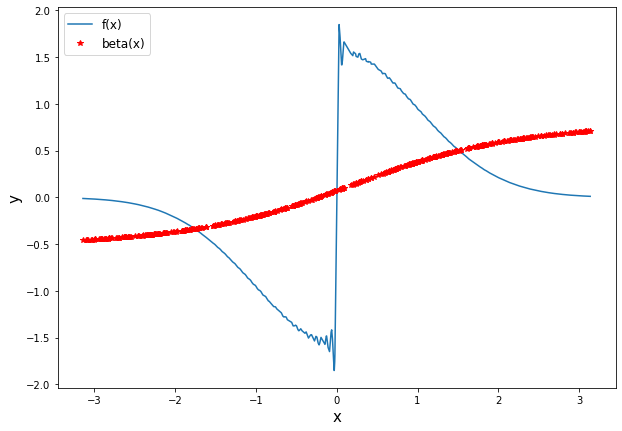

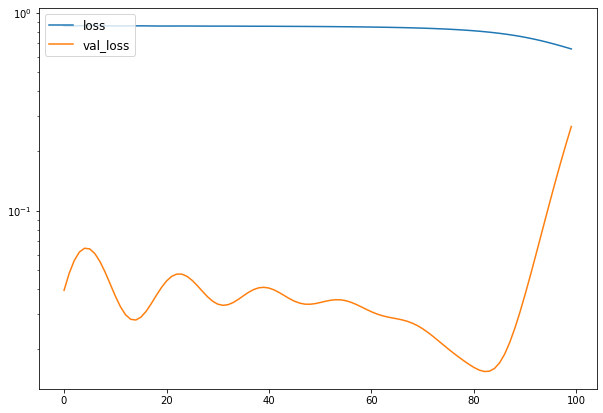

In [18]:
NN_epoch(100)

Epoch 1/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6437 - val_loss: 0.3211
Epoch 2/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.6325 - val_loss: 0.3842
Epoch 3/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.6218 - val_loss: 0.4558
Epoch 4/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.6116 - val_loss: 0.5360
Epoch 5/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.6021 - val_loss: 0.6245
Epoch 6/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.5934 - val_loss: 0.7208
Epoch 7/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.5856 - val_loss: 0.8238
Epoch 8/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.5787 - val_loss: 0.9319
Epoch 9/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.5727 - val_loss: 1.0430
Epoch 10/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.5677 - val_loss: 1.1550
Epoch 11/

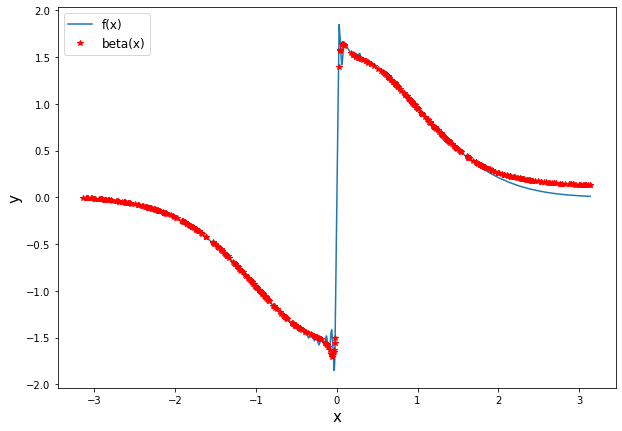

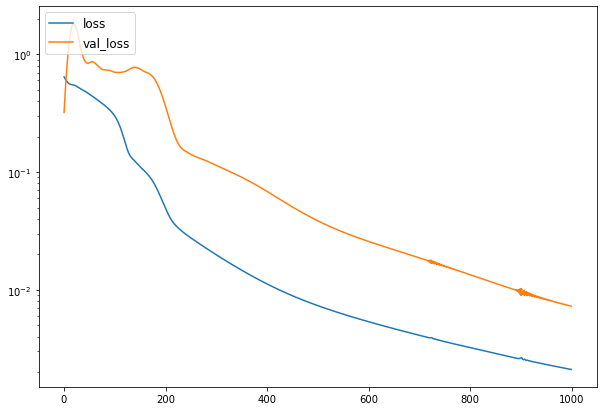

In [19]:
NN_epoch(1000)

Epoch 1/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.0021 - val_loss: 0.0072
Epoch 2/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0021 - val_loss: 0.0072
Epoch 3/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - val_loss: 0.0072
Epoch 4/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0021 - val_loss: 0.0072
Epoch 5/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0021 - val_loss: 0.0072
Epoch 6/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0021 - val_loss: 0.0071
Epoch 7/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0021 - val_loss: 0.0071
Epoch 8/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0021 - val_loss: 0.0071
Epoch 9/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0021 - val_loss: 0.0071
Epoch 10/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0021 - val_loss: 0.0071
Epoch 11/

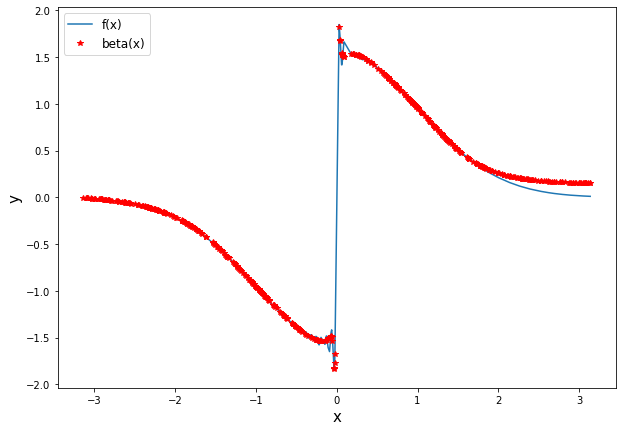

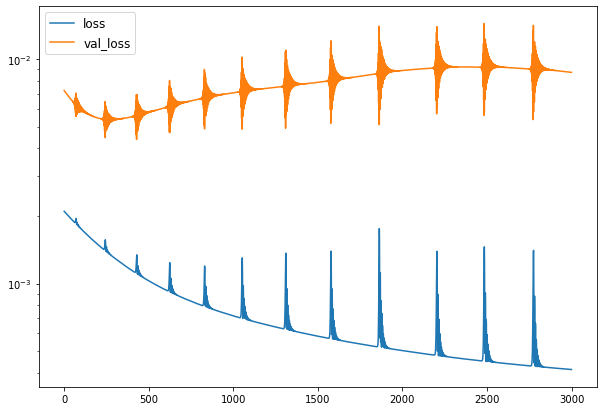

In [20]:
NN_epoch(3000)

Epoch 1/5000
1/1 [==============================] - 0s 35ms/step - loss: 4.1427e-04 - val_loss: 0.0087
Epoch 2/5000
1/1 [==============================] - 0s 17ms/step - loss: 4.1421e-04 - val_loss: 0.0087
Epoch 3/5000
1/1 [==============================] - 0s 17ms/step - loss: 4.1415e-04 - val_loss: 0.0087
Epoch 4/5000
1/1 [==============================] - 0s 18ms/step - loss: 4.1409e-04 - val_loss: 0.0087
Epoch 5/5000
1/1 [==============================] - 0s 17ms/step - loss: 4.1403e-04 - val_loss: 0.0087
Epoch 6/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.1397e-04 - val_loss: 0.0087
Epoch 7/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1391e-04 - val_loss: 0.0087
Epoch 8/5000
1/1 [==============================] - 0s 17ms/step - loss: 4.1385e-04 - val_loss: 0.0087
Epoch 9/5000
1/1 [==============================] - 0s 17ms/step - loss: 4.1379e-04 - val_loss: 0.0087
Epoch 10/5000
1/1 [==============================] - 0s 17ms/step - loss:

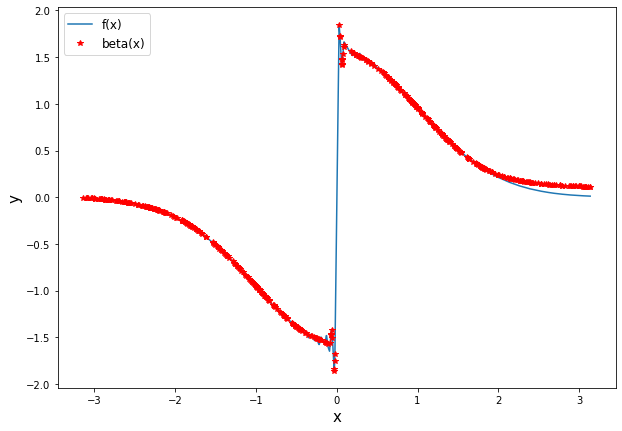

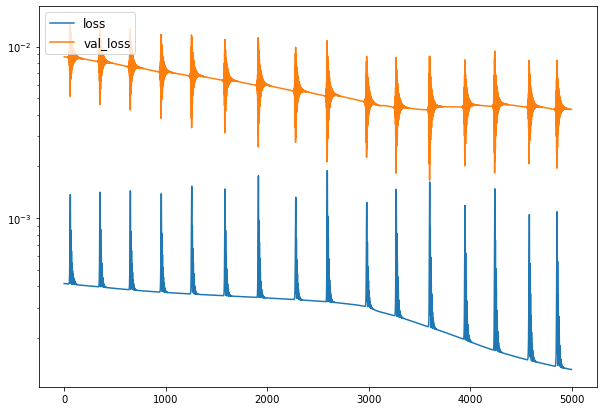

In [21]:
NN_epoch(5000)